# Razredi riječi


In [1]:
import nltk

In [8]:
nltk.download('brown')
nltk.download('universal_tagset')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\student\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\student\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\universal_tagset.zip.


True

In [6]:
# brown corpus
from nltk.corpus import brown
examples = brown.tagged_words()[:10]
examples

[('The', 'AT'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('Grand', 'JJ-TL'),
 ('Jury', 'NN-TL'),
 ('said', 'VBD'),
 ('Friday', 'NR'),
 ('an', 'AT'),
 ('investigation', 'NN'),
 ('of', 'IN')]

<Axes: xlabel='Samples', ylabel='Counts'>

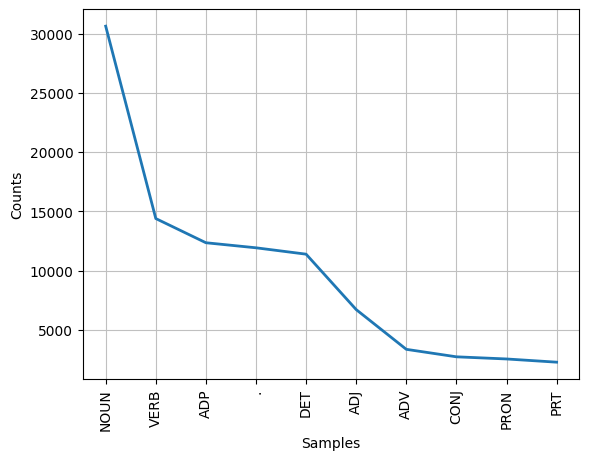

In [13]:
# pitanje: Koje su vrste oznaka najcesce u brown korpusu?
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')


brown_news_tagged[:10]


tags = [tag for (word, tag) in brown_news_tagged]
tag_fd = nltk.FreqDist(tags)
tags
tag_fd = nltk.FreqDist(tags)
tag_fd.most_common() # najcesce oznake
tag_fd.plot(10)

## Izgradnja označavatelja

In [39]:
# stvorimo skup za treniranje i testiranje

from nltk.corpus import brown

brown_sents = brown.sents(categories='news')
brown_tagged_sents = brown.tagged_sents(categories='news', tagset='universal')

size= int(len (brown_tagged_sents) *0.9)

train_sents = brown_tagged_sents[:size]
test_tagged_sents = brown_tagged_sents[size:]
test_untagged_sents = brown_sents[size:]


test_tagged_sents[0]



[('But', 'CONJ'),
 ('in', 'ADP'),
 ('all', 'PRT'),
 ('its', 'DET'),
 ('175', 'NUM'),
 ('years', 'NOUN'),
 (',', '.'),
 ('not', 'ADV'),
 ('a', 'DET'),
 ('single', 'ADJ'),
 ('Negro', 'NOUN'),
 ('student', 'NOUN'),
 ('has', 'VERB'),
 ('entered', 'VERB'),
 ('its', 'DET'),
 ('classrooms', 'NOUN'),
 ('.', '.')]

In [33]:
# označavanje na temelju regexa
patterns = [
    (r'.*ing$', 'VERB'),
    (r'.*ed$', 'VERB'),
    (r'.*es$', 'VERB'),
    (r'.*ould$', 'VERB'),       
    (r'.*\'s$', 'NOUN'),
    (r'.*s$', 'NOUN'),  
    (r'^[0-9]+$', 'NUM'),
    (r'.*', 'NOUN'),
    (r'.*\bto\b', 'INTERJECTION'),
    (r'.*ly$', 'ADV'),
    (r'.*ness$', 'NOUN'),
    (r'.*ment$', 'NOUN')
]

regexp_tagger = nltk.RegexpTagger(patterns)
test_sent = brown_sents[5]

tagged_sent= regexp_tagger.tag(test_sent)
tagged_sent

# evaluacija označavatelja na testnom skupu
acc= regexp_tagger.accuracy(test_sents)
print(f"Točnost označavatelja na testnom skupu: {acc:.4f}")

Točnost označavatelja na testnom skupu: 0.3076


### N-gramski označavatelj

In [28]:
# unigramski model
unigram_tagger = nltk.UnigramTagger(train_sents)

#oznaci skup za testiranje
tagged_sent = unigram_tagger.tag(test_sent)
tagged_sent


# izracunaj evaluaciju i ispisi točnost 
acc = unigram_tagger.accuracy(test_sents)
print(f"Točnost unigramskog označavatelja na testnom skupu: {acc:.4f}")

Točnost unigramskog označavatelja na testnom skupu: 0.8451


In [30]:
# bigramski model
bigram_tagger = nltk.BigramTagger(train_sents)
#oznaci skup za testiranje
tagged_sent = bigram_tagger.tag(test_sent)
tagged_sent
# izracunaj evaluaciju i ispisi točnost 
acc = bigram_tagger.accuracy(test_sents)    
print(f"Točnost bigramskog označavatelja na testnom skupu: {acc:.4f}")

Točnost bigramskog označavatelja na testnom skupu: 0.1483


In [32]:
# trigramski model
trigram_tagger = nltk.TrigramTagger(train_sents)    
#oznaci skup za testiranje
tagged_sent = trigram_tagger.tag(test_sent)
tagged_sent
# izracunaj evaluaciju i ispisi točnost 
acc = trigram_tagger.accuracy(test_sents)   
print(f"Točnost trigramskog označavatelja na testnom skupu: {acc:.4f}")

Točnost trigramskog označavatelja na testnom skupu: 0.0794


In [40]:
# kombinirani model
t0 = nltk.RegexpTagger(patterns)
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t3 = nltk.TrigramTagger(train_sents, backoff=t2)
#oznaci skup za testiranje
tagged_sent = t3.tag(test_sent)
tagged_sent

# izracunaj evaluaciju i ispisi točnost
acc = t3.accuracy(test_sents)
print(f"Točnost kombiniranog označavatelja na testnom skupu: {acc:.4f}")

Točnost kombiniranog označavatelja na testnom skupu: 0.9242


In [42]:
# matrica zbunjensosti
from nltk import ConfusionMatrix
# radi efikasnosti koristimo chain.from_iterable
text_tags = [tag for (word, tag) in nltk.chain.from_iterable(test_tagged_sents)]
pred_tags = [tag for (word, tag) in nltk.chain.from_iterable(t3.tag(sent) for sent in test_untagged_sents)]
cm = ConfusionMatrix(text_tags, pred_tags)
print(cm)

     |                        C         N         P         V      |
     |         A    A    A    O    D    O    N    R    P    E      |
     |         D    D    D    N    E    U    U    O    R    R      |
     |    .    J    P    V    J    T    N    M    N    T    B    X |
-----+-------------------------------------------------------------+
   . |<1301>   .    .    .    .    .    .    .    .    .    .    . |
 ADJ |    . <537>   .   18    .    .  151    .    .    .   21    . |
 ADP |    .    .<1197>   7    1    .    2    .    1   83    .    . |
 ADV |    .   28   28 <312>   .    1   32    .    .    4    2    . |
CONJ |    .    .    .    . <285>   2    .    .    .    .    .    . |
 DET |    .    .   11    1    .<1136>   .    .    .    .    .    . |
NOUN |    .   22    .    .    .    .<2554>   1    .    .  136    . |
 NUM |    .    .    .    .    .    .   23 <170>   .    .    .    . |
PRON |    .    .   11    .    .    .    .    . <212>   .    .    . |
 PRT |    .    .   47    3    .   